# Import data

In [1]:
## import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from keras.models import Sequential
from keras.layers import Dense,Dropout
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report





In [2]:
## read the data
df=pd.read_csv(r"news_articles.csv")
df

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [4]:
## check missing value
print(df.isnull().sum())


author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64


In [5]:
df = df[df.notnull().all(axis=1)]

In [6]:
print(df.isnull().sum())

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64


In [7]:
df['label'].value_counts()

Fake    1291
Real     754
Name: label, dtype: int64

imbalanced data

# Exploratory Data Analysis

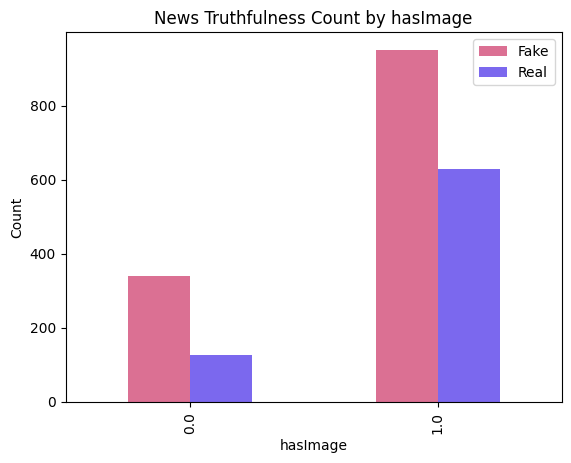

In [8]:
##News Truthfulness Count by hasImage
grouped= df.groupby(['hasImage', 'label']).size().unstack()

# Plot the bar chart
type = grouped.plot(kind='bar', color=['palevioletred', 'mediumslateblue'])

# Set the title and labels for the chart
plt.title('News Truthfulness Count by hasImage')
plt.xlabel('hasImage')
plt.ylabel('Count')
plt.legend(['Fake','Real'])
plt.show()


News are more likely to be true when has image

In [9]:
##News Truthfulness Count by website
##Categorize the website publish Real and fake news
web_real=[]
web_fake=[]

for i,row in df.iterrows():
    val = row['site_url']
    if row['label'] == 'Real':
        web_real.append(val)
    elif row['label']== 'Fake':
        web_fake.append(val)

In [10]:
##eliminate duplicate value in lists
unique_web_real=list(set(web_real))
unique_web_fake=list(set(web_fake))


In [11]:
print(unique_web_fake)
print(unique_web_real)

['adobochronicles.com', 'ahtribune.com', 'fromthetrenchesworldreport.com', 'newstarget.com', 'departed.co', 'thedailysheeple.com', 'thesaker.is', 'thepeoplescube.com', 'intrepidreport.com', 'themindunleashed.com', 'whatreallyhappened.com', 'davidduke.com', 'washingtonsblog.com', 'activistpost.com', 'veteranstoday.com', 'abcnews.com.co', 'presstv.ir', 'awdnews.com', 'amtvmedia.com', 'clickhole.com', 'abeldanger.net', 'dennismichaellynch.com', 'darkmoon.me', 'infowars.com', 'shiftfrequency.com', 'voltairenet.org', 'theeconomiccollapseblog.com', 'allnewspipeline.com', 'galacticconnection.com', '21stcenturywire.com', 'corbettreport.com', 'barenakedislam.com', 'theonion.com', 'amren.com', 'dcclothesline.com', 'topinfopost.com', 'thetruthseeker.co.uk', 'countercurrents.org', 'globalresearch.ca', 'madworldnews.com', 'coasttocoastam.com', 'americasfreedomfighters.com', 'projectveritas.com', 'defenddemocracy.press', 'theunrealtimes.com', 'counterpunch.org', 'thefreethoughtproject.com', 'theruss

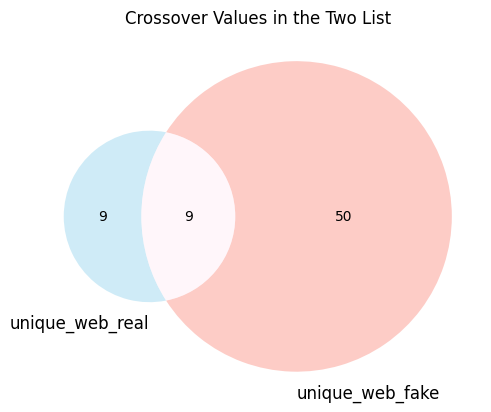

In [12]:
##Plot Venn digram for website publish Fake and Real news
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Find the intersection of the two lists
intersection = list(set(unique_web_real) & set(unique_web_fake))

# Check if there is an intersection
if len(intersection) > 0:
    # Draw a Venn diagram to visualize the overlap
    venn2([set(unique_web_real), set(unique_web_fake)], set_colors=('skyblue', 'salmon'), set_labels=('unique_web_real', 'unique_web_fake'))
    plt.title('Crossover Values in the Two List')

else:
    print("The two lists do not have crossover values.")

In [13]:
unique_fake = set(unique_web_fake).difference(intersection)
unique_real = set(unique_web_real).difference(intersection)
print("Website always publish real news:", unique_real)
print("Website always publish fake news:", unique_fake)
print("Website publish both real and fake news:", intersection)

Website always publish real news: {'addictinginfo.org', 'redstatewatcher.com', 'whydontyoutrythis.com', 'dailywire.com', 'politicususa.com', 'wnd.com', 'proudemocrat.com', '100percentfedup.com', 'presstv.com'}
Website always publish fake news: {'adobochronicles.com', 'ahtribune.com', 'departed.co', 'thedailysheeple.com', 'thesaker.is', 'thepeoplescube.com', 'intrepidreport.com', 'themindunleashed.com', 'whatreallyhappened.com', 'activistpost.com', 'veteranstoday.com', 'abcnews.com.co', 'awdnews.com', 'amtvmedia.com', 'clickhole.com', 'abeldanger.net', 'dennismichaellynch.com', 'darkmoon.me', 'infowars.com', 'shiftfrequency.com', 'voltairenet.org', 'theeconomiccollapseblog.com', 'allnewspipeline.com', 'galacticconnection.com', '21stcenturywire.com', 'corbettreport.com', 'barenakedislam.com', 'theonion.com', 'amren.com', 'dcclothesline.com', 'topinfopost.com', 'thetruthseeker.co.uk', 'countercurrents.org', 'globalresearch.ca', 'madworldnews.com', 'coasttocoastam.com', 'americasfreedomfig

In [14]:
# interactive plot
fig = px.sunburst(df, path=['label', 'type'])
fig.show()

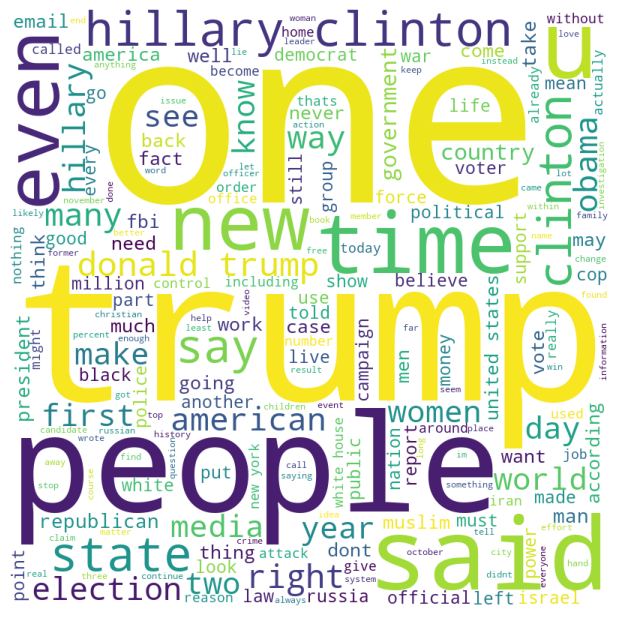

In [15]:
from wordcloud import WordCloud

comment_words = ''

for val in df[df['label'] == 'Real']['text_without_stopwords']:
     
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

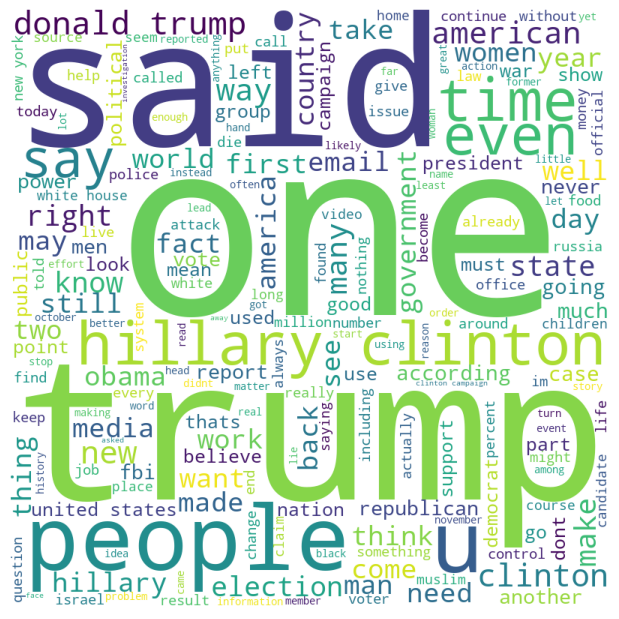

In [16]:
for val in df[df['label'] == 'Fake']['text_without_stopwords']:
     
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Text feature pre-processing

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')


def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(stemmer.stem(token))
    return " ".join(tokens)
    
df['title_processed'] = df['title'].apply(lambda x: preprocess_text(x))
df['text_processed'] = df['text'].apply(lambda x: preprocess_text(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\V\AppData\Local\Temp\ipykernel_27028\667586255.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\V\AppData\Local\Temp\ipykernel_27028\667586255.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
##tokenize 

nltk.download('punkt')

df['text_processed'] = df.apply(lambda row: nltk.word_tokenize(row['text_processed']), axis=1)
df['title_processed'] = df.apply(lambda row: nltk.word_tokenize(row['title_processed']), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\V\AppData\Local\Temp\ipykernel_27028\3983286947.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\V\AppData\Local\Temp\ipykernel_27028\3983286947.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




# Convert other features to numeric data

In [19]:
#Convert the categorical feature 'type' to numerical labels:

encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

C:\Users\V\AppData\Local\Temp\ipykernel_27028\1287617848.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
#Convert the categorical feature 'url' to numerical label:
df['site_url']	=encoder.fit_transform(df['site_url'])

C:\Users\V\AppData\Local\Temp\ipykernel_27028\2848019393.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
#Convert the categorical feature 'url' to numerical label:
df['label']	=encoder.fit_transform(df['label'])

C:\Users\V\AppData\Local\Temp\ipykernel_27028\3307536396.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
print(encoder.classes_)

['Fake' 'Real']


# model building

In [23]:
#final dataset
convert=list(zip(df['site_url'],df['hasImage'],df['text_processed'],df['title_processed'],df['label']))
new_df = pd.DataFrame(convert, columns = ['site_url', 'hasImage','text_processed','title_processed','label'])
new_df[1800:]

,site_url,hasImage,text_processed,title_processed,label
1800,48,0.0,"[home, badg, abus, genius, child, arrest, inte...","[modern, south, korea, like]",1
1801,48,0.0,"[home, badg, abus, cop, fire, shoot, yearold, ...","[men, bind, share, realize, truth]",1
1802,48,0.0,"[home, break, news, dapl, protest, proven, rig...","[like, live, kiev, marri, ukrainian, woman]",1
1803,48,0.0,"[home, chang, govern, corrupt, hillari, entir,...","[women, hate, femal, objectif, longer, profit]",1
1804,48,0.0,"[dapl, protest, proven, right, largest, gas, p...","[path, men, took, trump]",1
...,...,...,...,...,...
2040,67,0.0,"[prof, cano, reek, genocid, white, privileg, c...","[never, trumper, must, reconsid]",1
2041,67,1.0,"[teen, walk, free, gangrap, convict, judg, sai...","[elect, crossroad, social, capit]",1
2042,67,1.0,"[school, name, munichmassacr, mastermind, terr...","[reason, ill, vote, trump]",1
2043,67,1.0,"[war, rumor, war, russia, unveil, satan, missi...","[new, countri, women, minor, hit, hardest]",1


In [24]:
#Independent and dependent variable select
X=new_df.iloc[:,2:4]
y=new_df.iloc[:,-1]


Prediction model for 'text_processed"

In [25]:
#convert text feature to numerical sequences.
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer =TfidfVectorizer()
X['text_processed'] = X['text_processed'].apply(lambda x: ' '.join(x))
vectorizer.fit(X['text_processed'])
X_res1=vectorizer.transform(X['text_processed'])
X_res1= X_res1.toarray()

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res1, y, test_size=0.4, random_state=42)

In [27]:
##initialis the ANN
ann_model1=Sequential()

##set up the layers
#input layer
ann_model1.add(Dense(units=32, kernel_initializer='uniform',input_dim=33357,activation='relu'))
#hidden layer
ann_model1.add(Dense(units=16, kernel_initializer='uniform',activation='relu'))
##regularization
ann_model1.add(Dropout(0.2))
#hidden layer
ann_model1.add(Dense(units=8, kernel_initializer='uniform',activation='relu'))
##regularization
ann_model1.add(Dropout(0.2))
##output layer
ann_model1.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

## compliling the ANN
ann_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
##train the model
history1=ann_model1.fit(X_train,y_train, batch_size=10, epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
123/123 [==============================] - 5s 21ms/step - loss: 0.6817 - accuracy: 0.6153 - val_loss: 0.6425 - val_accuracy: 0.6553
Epoch 2/20
123/123 [==============================] - 2s 18ms/step - loss: 0.5864 - accuracy: 0.6153 - val_loss: 0.5405 - val_accuracy: 0.6553
Epoch 3/20
123/123 [==============================] - 2s 19ms/step - loss: 0.3638 - accuracy: 0.7889 - val_loss: 0.5733 - val_accuracy: 0.7152
Epoch 4/20
123/123 [==============================] - 2s 18ms/step - loss: 0.2723 - accuracy: 0.9804 - val_loss: 0.7267 - val_accuracy: 0.7090
Epoch 5/20
123/123 [==============================] - 2s 20ms/step - loss: 0.2368 - accuracy: 0.9878 - val_loss: 0.6987 - val_accuracy: 0.7200
Epoch 6/20
123/123 [==============================] - 2s 20ms/step - loss: 0.2144 - accuracy: 0.9935 - val_loss: 0.8244 - val_accuracy: 0.7188
Epoch 7/20
123/123 [==============================] - 2s 17ms/step - loss: 0.1971 - accuracy: 0.9935 - val_loss: 0.7788 - val_accuracy: 0.7311

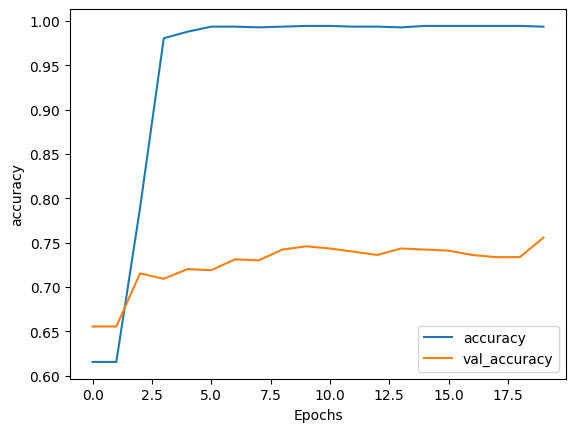

In [29]:
def plot_graphs(history1,string):
    plt.plot(history1.history[string])
    plt.plot(history1.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()
plot_graphs(history1,'accuracy')

In [30]:
y_pred_ann1=ann_model1.predict(X_test)

26/26 [==============================] - 0s 4ms/step


Prediction model for 'title_processed"

In [31]:
X['title_processed'] = X['title_processed'].apply(lambda x: ' '.join(x))
vectorizer.fit(X['title_processed'])
X_res2=vectorizer.transform(X['title_processed'])
X_res2= X_res2.toarray()

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res2, y, test_size=0.4, random_state=42)

In [33]:
##initialis the ANN
ann_model2=Sequential()

##set up the layers
#input layer
ann_model2.add(Dense(units=32, kernel_initializer='uniform',input_dim=4635,activation='relu'))
#hidden layer
ann_model2.add(Dense(units=16, kernel_initializer='uniform',activation='relu'))
##regularization
ann_model2.add(Dropout(0.2))
#hidden layer
ann_model2.add(Dense(units=8, kernel_initializer='uniform',activation='relu'))
##regularization
ann_model2.add(Dropout(0.2))
##output layer
ann_model2.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

## compliling the ANN
ann_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
##train the model
history2=ann_model2.fit(X_train,y_train, batch_size=10, epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
123/123 [==============================] - 4s 11ms/step - loss: 0.6865 - accuracy: 0.6137 - val_loss: 0.6685 - val_accuracy: 0.6553
Epoch 2/20
123/123 [==============================] - 1s 4ms/step - loss: 0.6517 - accuracy: 0.6153 - val_loss: 0.6244 - val_accuracy: 0.6553
Epoch 3/20
123/123 [==============================] - 1s 5ms/step - loss: 0.5412 - accuracy: 0.6153 - val_loss: 0.5765 - val_accuracy: 0.6553
Epoch 4/20
123/123 [==============================] - 1s 5ms/step - loss: 0.3924 - accuracy: 0.7604 - val_loss: 0.5974 - val_accuracy: 0.7127
Epoch 5/20
123/123 [==============================] - 1s 7ms/step - loss: 0.3272 - accuracy: 0.9226 - val_loss: 0.6561 - val_accuracy: 0.7103
Epoch 6/20
123/123 [==============================] - 1s 8ms/step - loss: 0.2926 - accuracy: 0.9315 - val_loss: 0.7514 - val_accuracy: 0.7115
Epoch 7/20
123/123 [==============================] - 1s 11ms/step - loss: 0.2742 - accuracy: 0.9421 - val_loss: 0.7462 - val_accuracy: 0.7103
Epoc

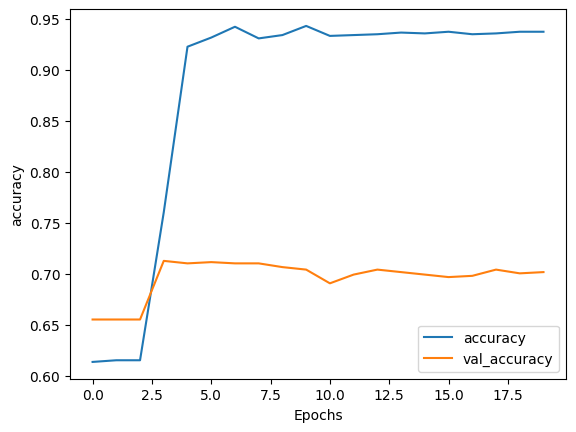

In [35]:
def plot_graphs(history2,string):
    plt.plot(history2.history[string])
    plt.plot(history2.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()
plot_graphs(history2,'accuracy')

In [36]:

y_pred_ann2=ann_model2.predict(X_test)

26/26 [==============================] - 0s 2ms/step


#  ann prediction across hasIage and url

In [37]:
#Independent and dependent variable select
X=new_df.iloc[:,0:2]
y=new_df.iloc[:,-1]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [39]:
##initialis the ANN
ann_model3=Sequential()

##set up the layers
#input layer
ann_model3.add(Dense(units=16, kernel_initializer='uniform',input_dim=2,activation='relu'))
#hidden layer
ann_model3.add(Dense(units=6, kernel_initializer='uniform',activation='relu'))
##regularization
ann_model3.add(Dropout(0.2))
##output layer
ann_model3.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

## compliling the ANN
ann_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
##train the model
history3=ann_model3.fit(X_train,y_train, batch_size=10, epochs=80,validation_data=(X_test, y_test))

Epoch 1/80
123/123 [==============================] - 3s 9ms/step - loss: 0.6881 - accuracy: 0.6153 - val_loss: 0.6782 - val_accuracy: 0.6553
Epoch 2/80
123/123 [==============================] - 1s 8ms/step - loss: 0.6679 - accuracy: 0.6520 - val_loss: 0.6441 - val_accuracy: 0.7017
Epoch 3/80
123/123 [==============================] - 1s 8ms/step - loss: 0.6252 - accuracy: 0.6854 - val_loss: 0.5955 - val_accuracy: 0.7042
Epoch 4/80
123/123 [==============================] - 1s 6ms/step - loss: 0.5983 - accuracy: 0.6830 - val_loss: 0.5681 - val_accuracy: 0.7066
Epoch 5/80
123/123 [==============================] - 1s 7ms/step - loss: 0.5783 - accuracy: 0.6944 - val_loss: 0.5583 - val_accuracy: 0.7506
Epoch 6/80
123/123 [==============================] - 1s 6ms/step - loss: 0.5694 - accuracy: 0.6936 - val_loss: 0.5478 - val_accuracy: 0.7518
Epoch 7/80
123/123 [==============================] - 1s 10ms/step - loss: 0.5729 - accuracy: 0.6764 - val_loss: 0.5441 - val_accuracy: 0.6968
Epoch

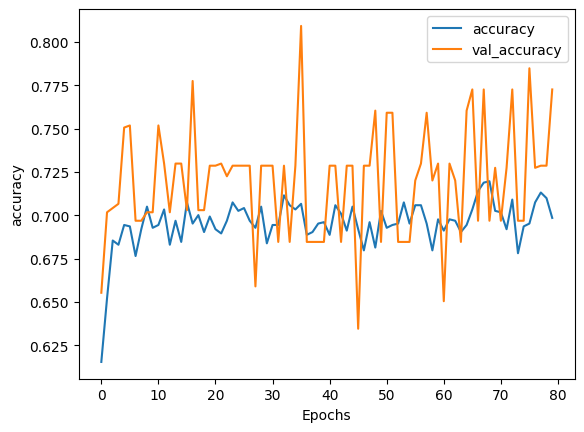

In [41]:
def plot_graphs(history3,string):
    plt.plot(history3.history[string])
    plt.plot(history3.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()
plot_graphs(history3,'accuracy')

In [42]:
y_pred_ann3=ann_model3.predict(X_test)

26/26 [==============================] - 0s 2ms/step


# Model Merge

In [59]:
# distribute different weights on each model
y_pred_ann_merge=np.where(y_pred_ann1*0.35+y_pred_ann2*0.35+y_pred_ann3*0.4>0.4,1,0)
y_pred_ann_merge=y_pred_ann_merge.flatten()

In [60]:
pd.DataFrame(({'Actual':y_test,'Predicted':y_pred_ann_merge}))

,Actual,Predicted
305,1,0
1283,0,0
368,0,0
479,0,0
1537,1,1
...,...,...
1004,0,0
621,0,0
849,1,1
1655,0,0


In [61]:
cm=confusion_matrix(y_test,y_pred_ann_merge)
cm

array([[459,  77],
       [ 75, 207]], dtype=int64)

precision: 72.88732394366197 
 recall 73.40425531914893 
 accuracy 81.41809290953546


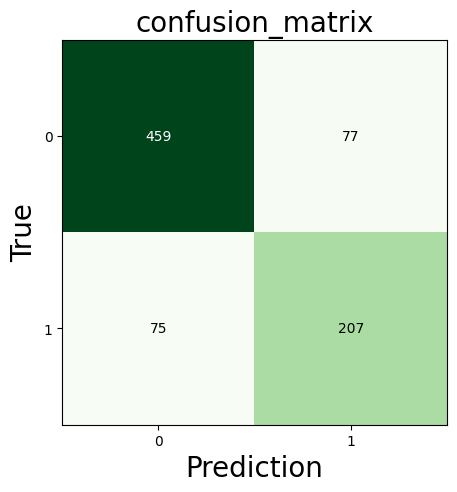

In [62]:

fig, ax=plot_confusion_matrix(conf_mat=cm,figsize=(5,5),cmap=plt.cm.Greens)
plt.xlabel('Prediction',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.title('confusion_matrix',fontsize=20)
[[TN,FP],[FN,TP]] = np.array(cm)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/(TN+FP+FN+TP)
print('precision:',precision*100,"\n recall",recall*100,"\n accuracy",accuracy*100)